In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
data = pd.read_csv('household_power_consumption.txt',sep=';',
                   parse_dates = True,
                   low_memory = False)

In [11]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [13]:
data['date_time'] = data['Date'].str.cat(data['Time'],sep=' ')
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00


In [14]:
data.drop(['Date', 'Time'],inplace = True, axis = 1)

In [15]:
#setting data and times as index
data.set_index(['date_time'], inplace = True)

In [18]:
#data.head
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
Global_active_power      object
Global_reactive_power    object
Voltage                  object
Global_intensity         object
Sub_metering_1           object
Sub_metering_2           object
Sub_metering_3           float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [20]:
# replacing all missing values with strings
data.replace('?', nan, inplace = True)

In [21]:
# converting the dataset to type floats
data = data.astype('float')

In [22]:
np.isnan(data).sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [25]:
# replacing null values with previous day results
def fill_missing(data):
    one_day = 24*60
    for row in range(data.shape[0]):
        for col in range(data.shape[1]):
            if np.isnan(data[row,col]):
                data[row,col]= data[row - one_day,col]

In [26]:
fill_missing(data.values)

In [27]:
np.isnan(data).sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

## preparing power consumption for each day

In [28]:
data.to_csv('cleaned_data.csv')

In [29]:
# to parse dates into dates in the pandas
dataset = pd.read_csv('cleaned_data.csv',parse_dates = True,
                     index_col = 'date_time',
                     low_memory = False)

### Exploratory data analysis

In [30]:
# resamples according to date and sums the minutes data
data = dataset.resample('D').sum()

In [32]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...
2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0


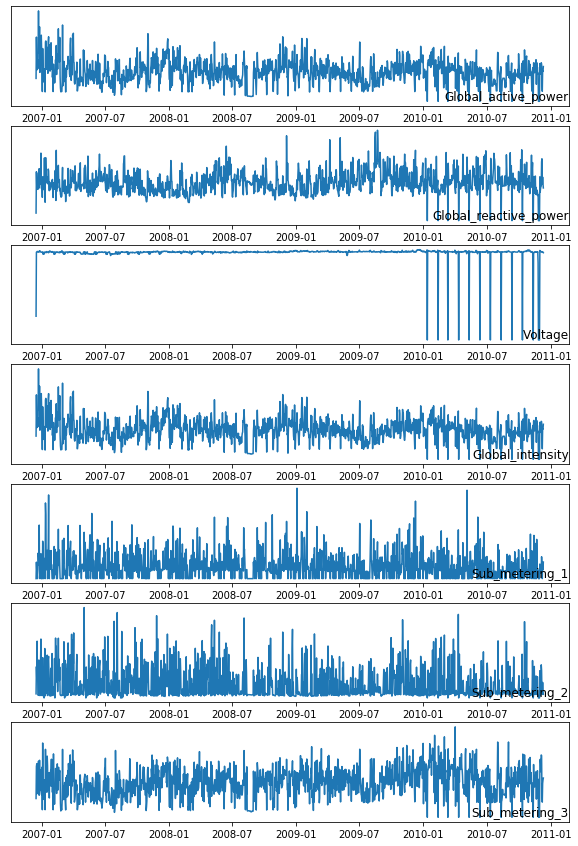

In [36]:
fig, ax = plt.subplots(figsize =(10,15))
for i in range(len(data.columns)):
    plt.subplot(len(data.columns),1,i+1)
    name = data.columns[i]
    plt.plot(data[name])
    plt.title(name, y=0, loc ='right')
    plt.yticks([])
plt.show()
fig.tight_layout()

### Exploring Active power consumption for each year

In [43]:
years = ['2007', '2008', '2009','2010']

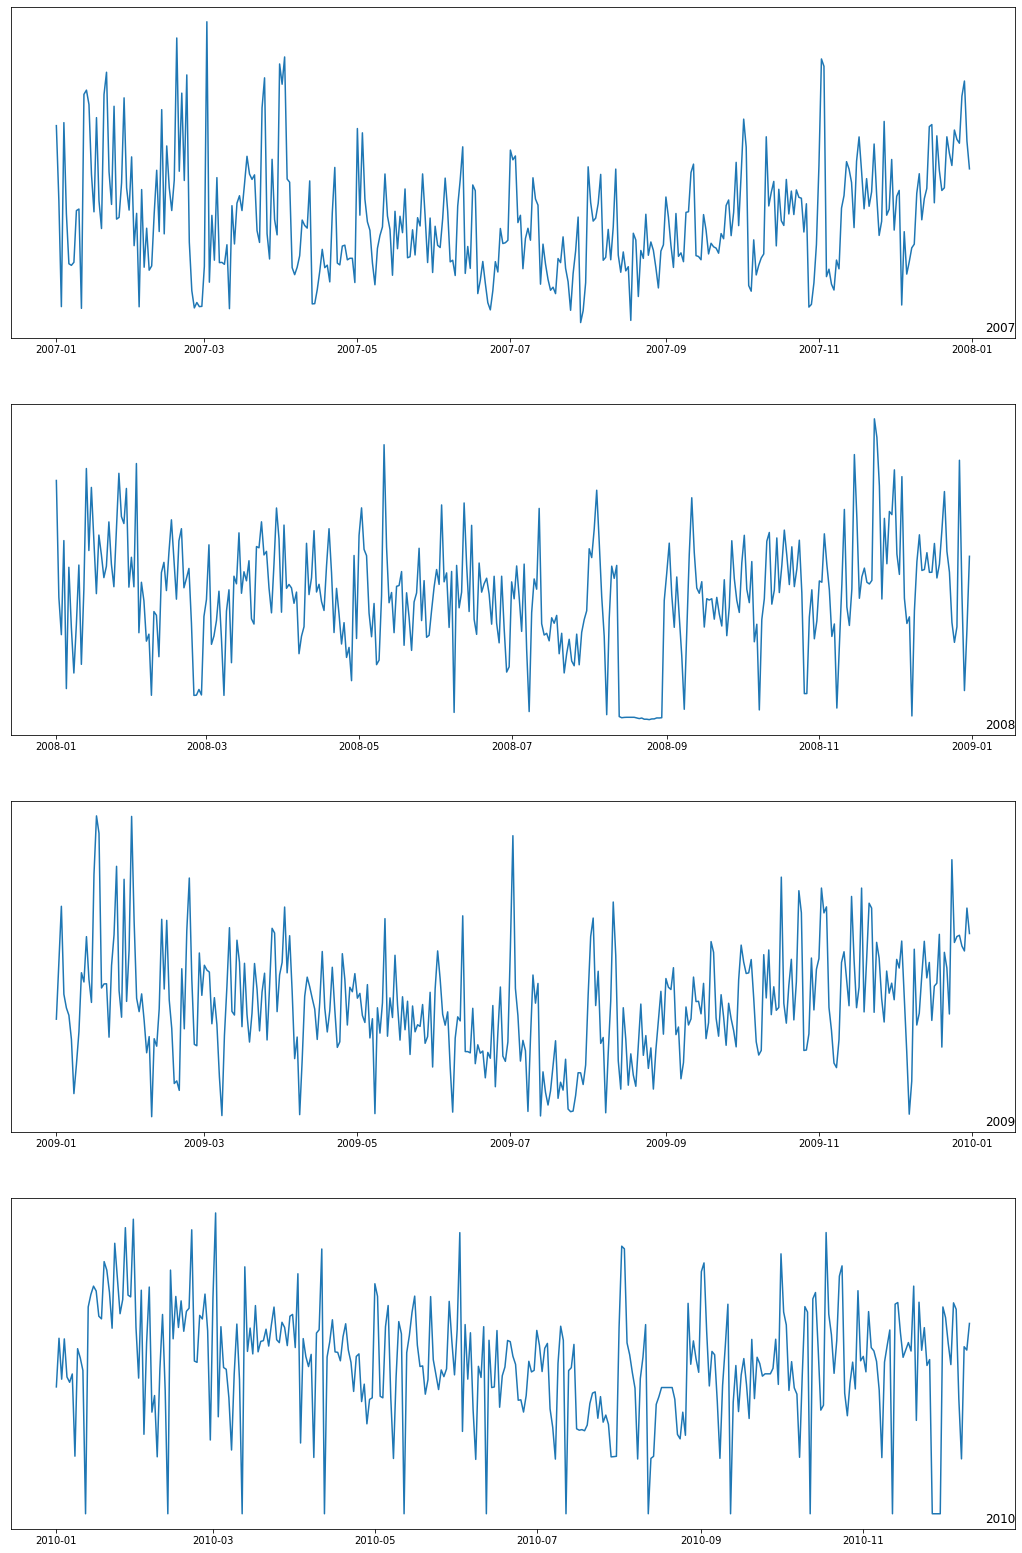

In [46]:
fig, ax = plt.subplots(figsize =(18,28))
for i in range(len(years)):
    plt.subplot(len(years),1,i+1)
    year = years[i]
    active_power_data = data[str(year)]
    plt.plot(active_power_data['Global_active_power'])
    plt.title(str(year), y=0, loc ='right')
    plt.yticks([])
plt.show()
fig.tight_layout()

### Power consumption with histogram

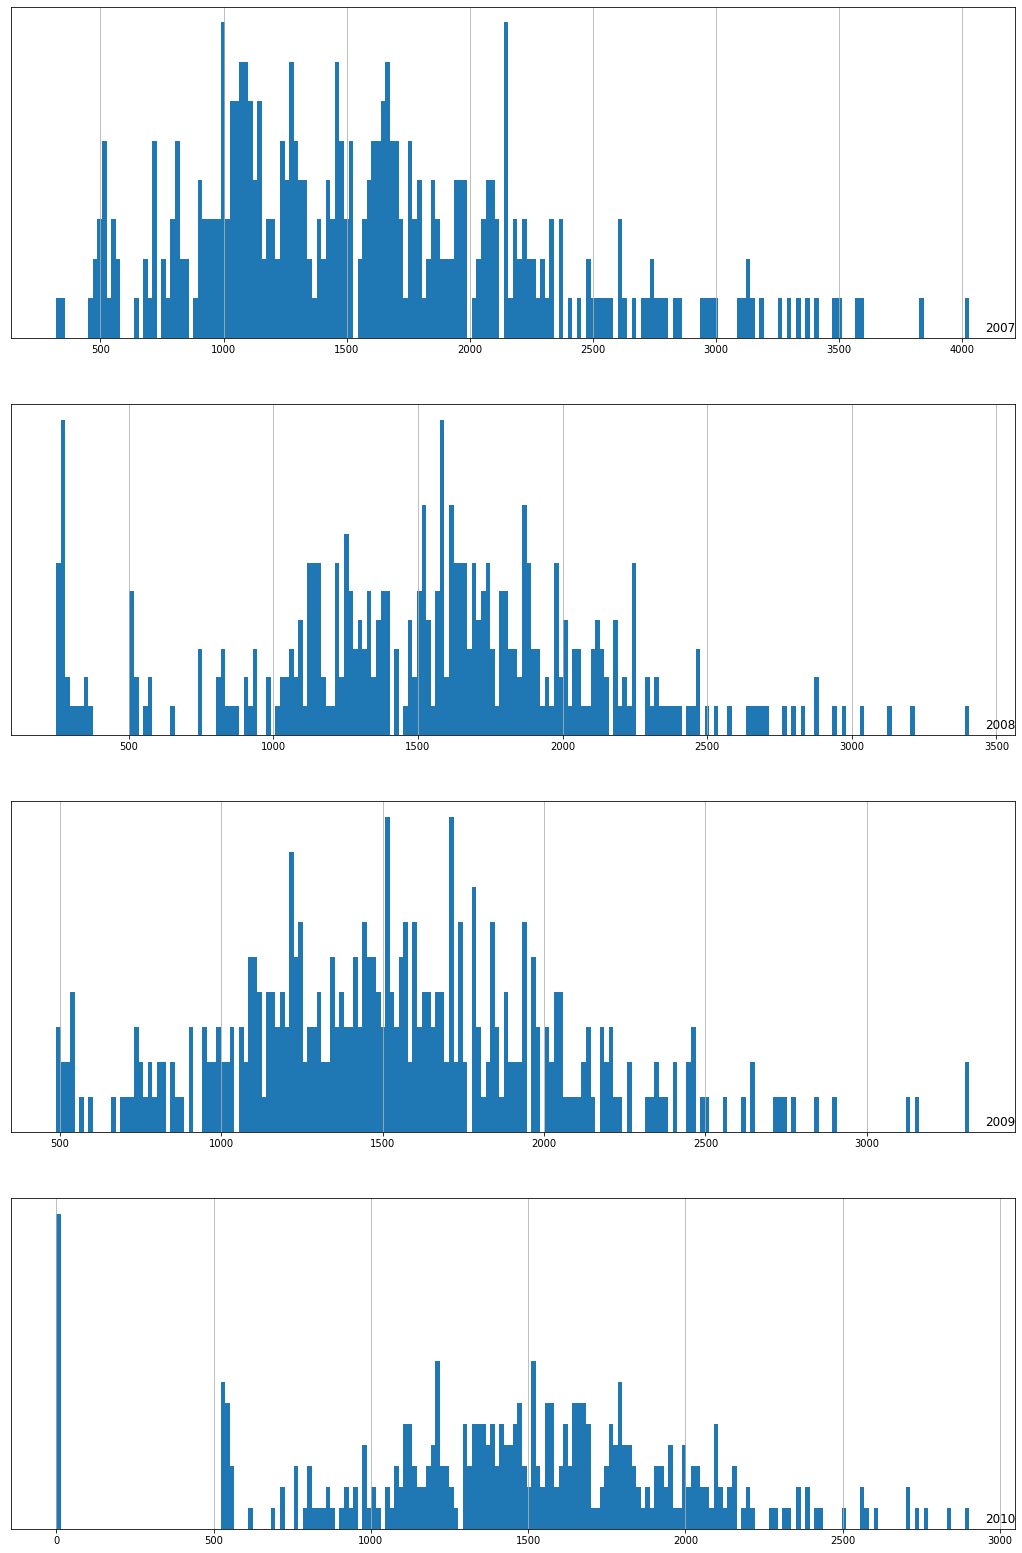

In [49]:
fig, ax = plt.subplots(figsize =(18,28))
for i in range(len(years)):
    plt.subplot(len(years),1,i+1)
    year = years[i]
    active_power_data = data[str(year)]
    active_power_data['Global_active_power'].hist(bins = 200)
    plt.title(str(year), y=0, loc ='right')
    plt.yticks([])
plt.show()
fig.tight_layout()

### plotting power consumption histogram for each month of 2007

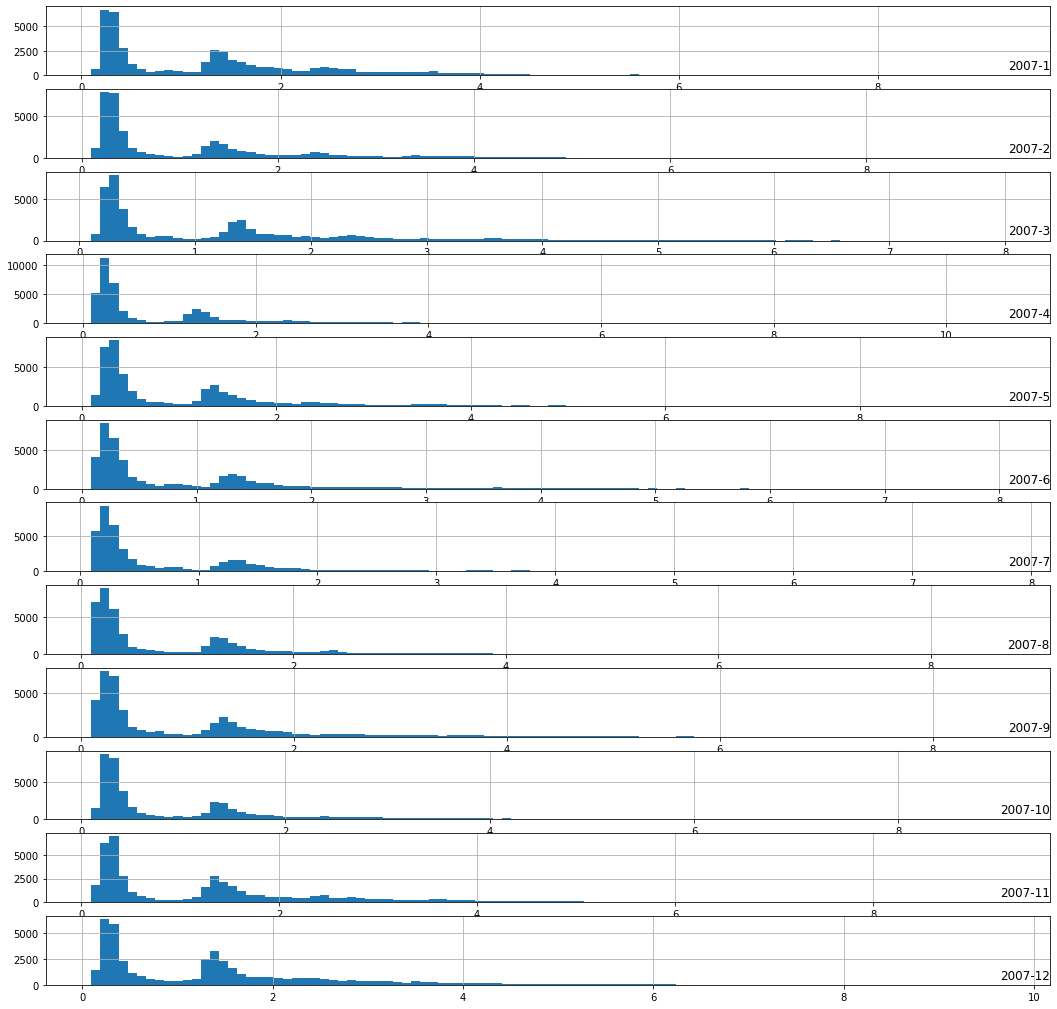

In [66]:
months = [i for i in range(1,13)]

fig, ax = plt.subplots(figsize =(18,18))
for i in range(len(months)):
    plt.subplot(len(months),1,i+1)
    month = '2007-' +str(months[i])
    active_power_data = dataset[month]
    active_power_data['Global_active_power'].hist(bins = 100)
    ax.set_xlim(0,5)
    plt.title(month, y=0, loc ='right')
    
plt.show()
fig.tight_layout()

## What can we predict
- Forecast hourly consumption for the next day
- Forecast daily consumption for the next week
- Forecast daily consumption for the next month
- Forecast monthly consumption for the next year

# Modelling Methods
- Naive methods --> would include methods that have very simple but often accurate assumption
- Classical Linear Methods --> Classical linear methods are very effective for univariate time series
- Machine Learning Methods --> Machine Learning methods require that the problem is framed as a supervised learning problem
    - K- nearest neighbours
    - SVM
    - Decision trees
    - Random forest
    - Gradient Boosting
- Deep learning Method --> combination of CNN LSTM and convLSTM prove to be very effective in time series data

# Problem Framing
Given recent power consumption of coming week ahead?


input --> predict
[week1]--week2

In [69]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [70]:
data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
2010-12-10,1579.692,170.268,345975.37,6741.2,1104.0,780.0,9812.0
2010-12-11,1836.822,151.144,343926.57,7826.2,2054.0,489.0,10308.0


In [93]:
data_train = dataset.loc[:'2009-12-31',:]['Global_active_power']
data_train

date_time
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
                       ...  
2009-12-31 23:55:00    1.746
2009-12-31 23:56:00    1.786
2009-12-31 23:57:00    1.784
2009-12-31 23:58:00    1.792
2009-12-31 23:59:00    1.792
Name: Global_active_power, Length: 1600236, dtype: float64

In [94]:
data_test = dataset['2010']['Global_active_power']
data_test.head()

date_time
2010-01-01 00:00:00    1.790
2010-01-01 00:01:00    1.780
2010-01-01 00:02:00    1.780
2010-01-01 00:03:00    1.746
2010-01-01 00:04:00    1.686
Name: Global_active_power, dtype: float64

In [95]:
data_train.shape,data_test.shape

((1600236,), (475023,))

## Preparing training data

In [105]:
data_train.head(14)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [98]:
data_train = np.array(data_train)

In [100]:
X_train, y_train = [],[]

for i in range(7,len(data_train)-7):
    X_train.append(data_train[i-7:i])
    y_train.append(data_train[i:i+7])

In [102]:
X_train,y_train = np.array(X_train), np.array(y_train)

In [103]:
X_train.shape,y_train.shape

((1600222, 7), (1600222, 7))

In [104]:
pd.DataFrame(y_train)

,0,1,2,3,4,5,6
0,3.700,3.668,3.662,4.448,5.412,5.224,5.268
1,3.668,3.662,4.448,5.412,5.224,5.268,4.054
2,3.662,4.448,5.412,5.224,5.268,4.054,3.384
3,4.448,5.412,5.224,5.268,4.054,3.384,3.270
4,5.412,5.224,5.268,4.054,3.384,3.270,3.430
...,...,...,...,...,...,...,...
1600217,1.712,1.716,1.720,1.722,1.714,1.704,1.704
1600218,1.716,1.720,1.722,1.714,1.704,1.704,1.746
1600219,1.720,1.722,1.714,1.704,1.704,1.746,1.786
1600220,1.722,1.714,1.704,1.704,1.746,1.786,1.784


In [106]:
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)

In [109]:
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)
X_train.shape

(1600222, 7)

In [111]:
X_train = X_train.reshape(1600222,7,1)

## building lstm

In [115]:
reg = Sequential()
reg.add(LSTM(units = 200, activation = 'relu', input_shape=(7,1)))
reg.add(Dense(7))

In [116]:
reg.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [117]:
reg.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 7)                 1407      
Total params: 163,007
Trainable params: 163,007
Non-trainable params: 0
_________________________________________________________________


In [118]:
reg.fit(X_train, y_train, epochs= 60 )

Train on 1600222 samples
Epoch 1/60
 248064/1600222 [===>..........................] - ETA: 27:21 - loss: 0.0020

KeyboardInterrupt: 